In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyaccel
import pymodels
from apsuite import WIP_lattice_errors
from mathphys.functions import save_pickle, load_pickle

Creating errors configs

In [2]:
dips_error = WIP_lattice_errors.DipolesErrors()
quads_error = WIP_lattice_errors.QuadsErrors()
sexts_error = WIP_lattice_errors.SextsErrors()
girder_error = WIP_lattice_errors.GirderErrors()
bpms_error = WIP_lattice_errors.BpmsErrors()
error_configs = [dips_error, quads_error, sexts_error,
                 bpms_error]

Generate errors and save in a file

In [3]:
# get family data
model = pymodels.si.create_accelerator()
famdata = pymodels.si.families.get_family_data(model)
spos = pyaccel.lattice.find_spos(model, indices='open')
# create a seed
seed = 123456

# create manage errors object
lattice_errors = WIP_lattice_errors.ManageErrors()
lattice_errors.nr_mach = 1
lattice_errors.nominal_model = model
lattice_errors.famdata = famdata
lattice_errors.spos = spos
lattice_errors.seed = seed
lattice_errors.error_configs = error_configs
lattice_errors.cutoff = 1
errors = lattice_errors.generate_errors(save_errors=True)

Load error file

In [4]:
data = lattice_errors.load_error_file('errors')
print(lattice_errors.nr_mach)
print(data.keys())
print('B1:')
print(data['B1'].keys())
print(np.shape(data['B1']['index']))
print(np.shape(data['B1']['posx']))
print('QFA:')
print(data['QFA'].keys())
print(np.shape(data['QFA']['index']))
print(np.shape(data['QFA']['posx']))
print(data['QFA']['multipoles'].keys())

1
dict_keys(['B1', 'B2', 'BC', 'QFA', 'QDA', 'Q1', 'Q2', 'Q3', 'Q4', 'QDB1', 'QFB', 'QDB2', 'QDP1', 'QFP', 'QDP2', 'QS', 'SFA0', 'SDA0', 'SDA1', 'SFA1', 'SDA2', 'SDA3', 'SFA2', 'SFB2', 'SDB3', 'SDB2', 'SFB1', 'SDB1', 'SDB0', 'SFB0', 'SFP2', 'SDP3', 'SDP2', 'SFP1', 'SDP1', 'SDP0', 'SFP0', 'BPM'])
B1:
dict_keys(['posx', 'posy', 'roll', 'pitch', 'yaw', 'excitation', 'kdip', 'multipoles', 'index'])
(40, 30)
(1, 40)
QFA:
dict_keys(['posx', 'posy', 'roll', 'pitch', 'yaw', 'excitation', 'multipoles', 'index'])
(10, 1)
(1, 10)
dict_keys(['normal', 'skew', 'r0'])


Applying errors...Done!


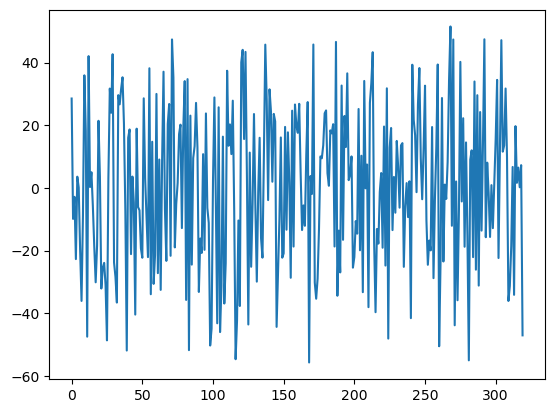

In [5]:
lattice_errors.generate_error_machines(nr_steps=5)

In [6]:
inds_quads = lattice_errors.bba_idcs
inds_bpm = lattice_errors.famdata['BPM']['index']
inds_girder = lattice_errors.famdata['girder']['index']
model1 = lattice_errors.models[0]
famdata = pymodels.si.families.get_family_data(model1)
# print(pyaccel.lattice.get_error_misalignment_x(model1, inds_quads))
# print(pyaccel.lattice.get_error_misalignment_x(model1, inds_bpm))
# print(pyaccel.lattice.get_error_misalignment_x(model1, inds_girder))